### Student names: Anh Ha, Dat Nguyen, Phuong Nguyen

From the abstracts dataset, using three different similarity thresholds (e.g. 0.5, 0.8, and 0.95), create an unweighted network from the obtained similar pairs (use MinHashing or LSH) for each threshold.

Find the communities for each network. Comment about the results with respect to the different thresholds and methods. How does it compare with the same analysis using 1-NN?

Use a ready-made software (eg. gephi) for visualizing one of your results.

### Obtain similar pairs for s =0.5, 0.8, 0.95 of the abstracts dataset by using Minhash_vectorizer 

In [21]:
import numpy as np
import os
import re
import binascii
from time import time

def get_fnames():
    """Read all text files in a folder.
    """
    fnames = []
    for root,_,files in os.walk("awd_1990_00"):
        for fname in files:
            if fname[-4:] == ".txt":
                fnames.append(os.path.join(root, fname))
    return fnames

In [22]:
print("number of different files: {}".format(len(get_fnames())))

number of different files: 379


In [23]:
def read_file(fname):
    with open(fname, 'r') as f:
        # skip all lines until abstract
        for line in f:
            if "Abstract    :" in line:
                break

        # get abstract as a single string
        abstract = ' '.join([line[:-1].strip() for line in f])
        abstract = re.sub(' +', ' ', abstract)  # remove double spaces
        return abstract

fname = get_fnames()[0]
print(fname,read_file(fname))

awd_1990_00\a9000006.txt  Commercial exploitation over the past two hundred years drove the great Mysticete whales to near extinction. Variation in the sizes of populations prior to exploitation, minimal population size during exploitation and current population sizes permit analyses of the effects of differing levels of exploitation on species with different biogeographical distributions and life-history characteristics. Dr. Stephen Palumbi at the University of Hawaii will study the genetic population structure of three whale species in this context, the Humpback Whale, the Gray Whale and the Bowhead Whale. The effect of demographic history will be determined by comparing the genetic structure of the three species. Additional studies will be carried out on the Humpback Whale. The humpback has a world-wide distribution, but the Atlantic and Pacific populations of the northern hemisphere appear to be discrete populations, as is the population of the southern hemispheric oceans. Each of 

In [24]:
def get_shingles(fname, k):
    """Get all shingles from requested file (hashes of these shingles)
    """
    with open(fname, 'r', errors = 'ignore') as f:
        # skip all lines until abstract
        for line in f:
            if "Abstract    :" in line:
                break

        # get abstract as a single string
        abstract = ' '.join([line[:-1].strip() for line in f])
        abstract = re.sub(' +', ' ', abstract)  # remove double spaces

        L = len(abstract)
        shingles = set()  # we use a set to automatically eliminate duplicates
        for i in range(L-k+1):
            shingle = abstract[i:i+k]
            crc = binascii.crc32(shingle.encode('utf-8')) #& 0xffffffff  # hash the shingle to a 32-bit integer
            shingles.add(crc)
        return shingles

In [25]:
fname = get_fnames()[0]
print("file:{}".format(fname))
print("number of shingles: {}".format(len(get_shingles(fname, k=5))))

file:awd_1990_00\a9000006.txt
number of shingles: 1026


In [26]:
import numpy
# set global parameters to process the whole dataset
bands = 5
rows = 20
nsig = bands*rows  # number of elements in signature, or the number of different random hash functions

maxShingleID = 2**32-1  # record the maximum shingle ID that we assigned
nextPrime = 4294967311  # next prime number after maxShingleID

A = numpy.random.randint(0, nextPrime/2, size=(nsig,), dtype=numpy.int64)
B = numpy.random.randint(0, nextPrime/2, size=(nsig,), dtype=numpy.int64)


In [27]:
def minhash_vectorized(shingles, A, B, nextPrime, maxShingleID, nsig):
    signature = numpy.ones((nsig,)) * (maxShingleID + 1)

    for ShingleID in shingles:
        hashCodes = ((A*ShingleID + B) % nextPrime) % maxShingleID
        numpy.minimum(signature, hashCodes, out=signature)

    return signature

In [28]:
def finding_candidates_minhash(s):
    signatures = []  # signatures for all files
    fnames = get_fnames()
    for fname in fnames:
        shingles = list(get_shingles(fname, k=5))
        sig = minhash_vectorized(shingles, A, B, nextPrime, maxShingleID, nsig)
        signatures.append(sig)
    Nfiles = len(signatures)
    minhash = []
    for i in range(Nfiles):
        for j in range(i+1, Nfiles):
            Jsim = numpy.mean(signatures[i] == signatures[j])  # average number of similar items in two vectors
            if Jsim >= s:
                minhash.append((i,j))
    print(f"found {len(minhash)} minhash similar pairs with k=5 and s={s}")
    print(f"minhash similar pairs k=5 s={s} of files are:")
    for i,j in minhash:
        print(fnames[i], fnames[j])
    return minhash

In [29]:
minhash05=finding_candidates_minhash(0.5)
minhash08=finding_candidates_minhash(0.8)
minhash095=finding_candidates_minhash(0.95)

found 93 minhash similar pairs with k=5 and s=0.5
minhash similar pairs k=5 s=0.5 of files are:
awd_1990_00\a9000046.txt awd_1990_00\a9000048.txt
awd_1990_00\a9000046.txt awd_1990_00\a9000049.txt
awd_1990_00\a9000046.txt awd_1990_00\a9000130.txt
awd_1990_00\a9000046.txt awd_1990_00\a9000158.txt
awd_1990_00\a9000046.txt awd_1990_00\a9000246.txt
awd_1990_00\a9000046.txt awd_1990_00\a9000251.txt
awd_1990_00\a9000046.txt awd_1990_00\a9000312.txt
awd_1990_00\a9000046.txt awd_1990_00\a9000343.txt
awd_1990_00\a9000046.txt awd_1990_00\a9000393.txt
awd_1990_00\a9000046.txt awd_1990_00\a9000463.txt
awd_1990_00\a9000048.txt awd_1990_00\a9000049.txt
awd_1990_00\a9000048.txt awd_1990_00\a9000130.txt
awd_1990_00\a9000048.txt awd_1990_00\a9000158.txt
awd_1990_00\a9000048.txt awd_1990_00\a9000246.txt
awd_1990_00\a9000048.txt awd_1990_00\a9000251.txt
awd_1990_00\a9000048.txt awd_1990_00\a9000312.txt
awd_1990_00\a9000048.txt awd_1990_00\a9000343.txt
awd_1990_00\a9000048.txt awd_1990_00\a9000393.txt
awd_

### Create unweighted network

In [30]:
!pip install networkx

In [31]:
print(minhash05)

[(6, 7), (6, 8), (6, 31), (6, 47), (6, 71), (6, 73), (6, 94), (6, 102), (6, 126), (6, 155), (7, 8), (7, 31), (7, 47), (7, 71), (7, 73), (7, 94), (7, 102), (7, 126), (7, 155), (8, 31), (8, 47), (8, 71), (8, 73), (8, 94), (8, 102), (8, 126), (8, 155), (31, 47), (31, 71), (31, 73), (31, 94), (31, 102), (31, 126), (31, 155), (47, 71), (47, 73), (47, 94), (47, 102), (47, 126), (47, 155), (52, 152), (67, 68), (67, 69), (67, 127), (67, 129), (67, 179), (67, 361), (68, 69), (68, 127), (68, 129), (68, 179), (68, 361), (69, 127), (69, 129), (69, 179), (69, 361), (71, 73), (71, 94), (71, 102), (71, 126), (71, 155), (73, 102), (73, 126), (73, 155), (82, 140), (94, 102), (94, 126), (94, 155), (102, 126), (102, 155), (106, 178), (106, 365), (116, 117), (116, 123), (116, 351), (117, 123), (117, 351), (123, 351), (126, 155), (127, 129), (127, 179), (127, 361), (129, 179), (129, 361), (132, 133), (178, 365), (179, 361), (209, 247), (209, 259), (209, 303), (247, 259), (247, 303), (259, 303)]


In [32]:
%matplotlib inline  
import networkx as nx
import matplotlib.pyplot as plt

import matplotlib
matplotlib.rcParams['figure.figsize'] = [20, 10]

Unweighted network graph of similarity pairs with s=0.5


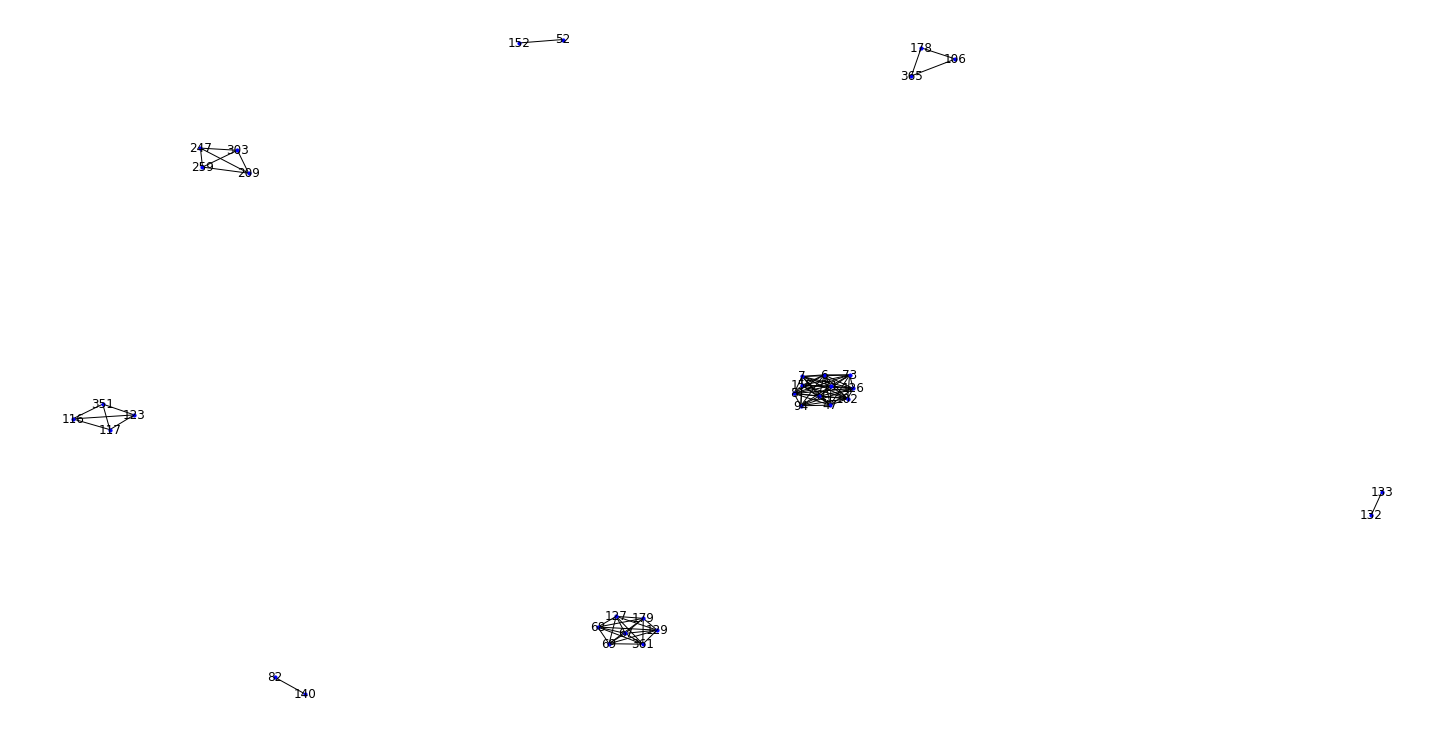

In [33]:
print("Unweighted network graph of similarity pairs with s=0.5")
G05 = nx.Graph()
G05.add_edges_from(minhash05)
nx.draw(G05,with_labels = True,node_size=10,node_color="blue")

Unweighted network graph of similarity pairs with s=0.8


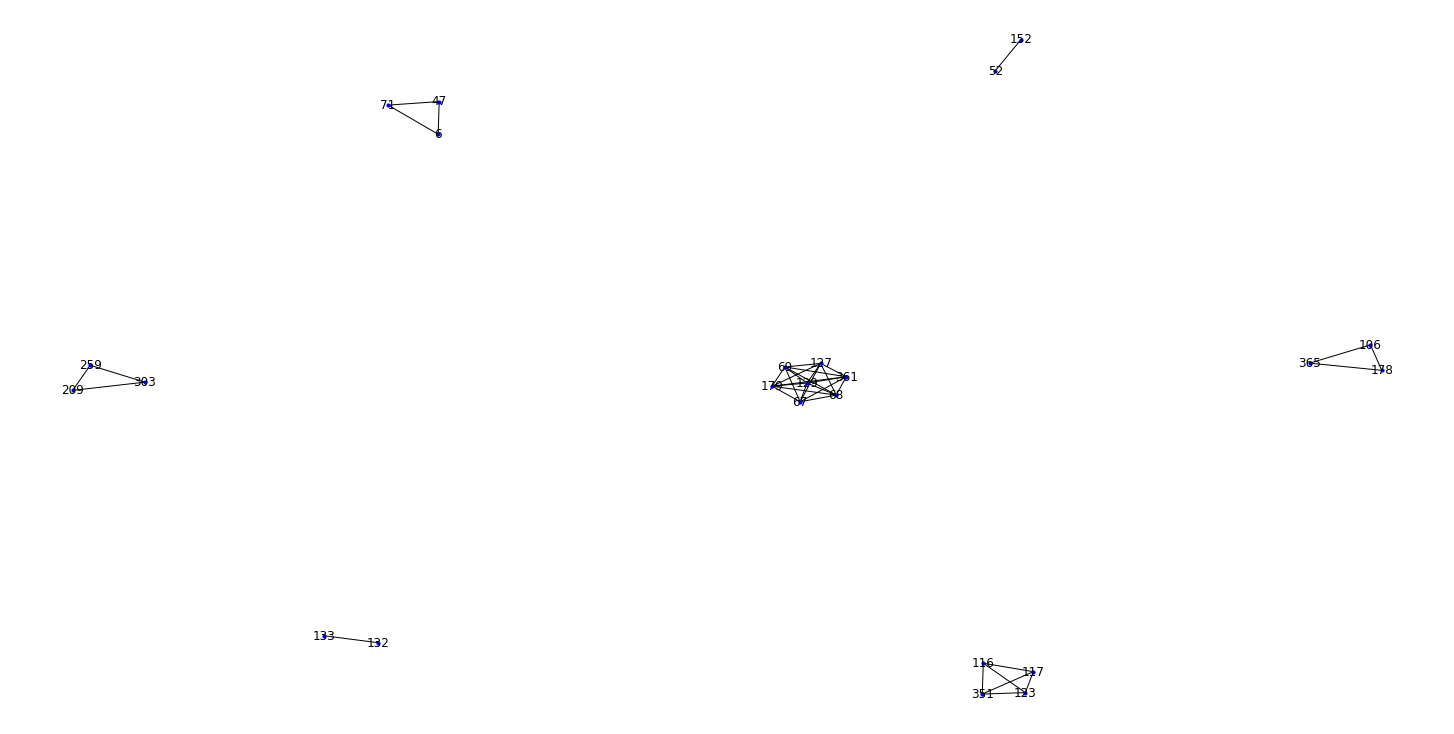

In [34]:
print("Unweighted network graph of similarity pairs with s=0.8")
G08 = nx.Graph()
G08.add_edges_from(minhash08)
nx.draw(G08,with_labels = True,node_size=10,node_color="blue")

Unweighted network graph of similarity pairs with s=0.95


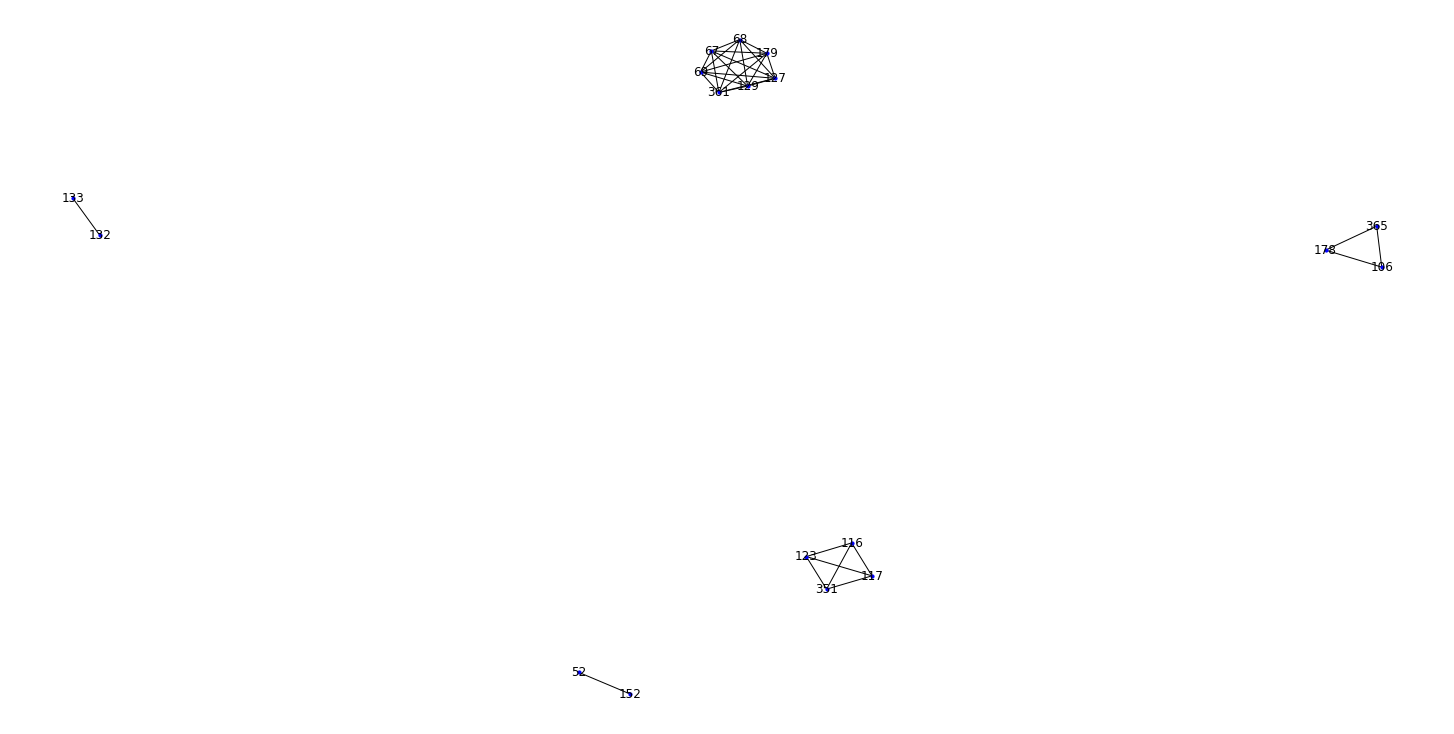

In [35]:
print("Unweighted network graph of similarity pairs with s=0.95")
G095 = nx.Graph()
G095.add_edges_from(minhash095)
nx.draw(G095,with_labels = True,node_size=10,node_color="blue")

### Find communities with s = 0.5, 0.8, 0.95 and compare results with 1-nn results


### Communities with s = 0.5

In [36]:
from networkx.algorithms.community.centrality import girvan_newman
from operator import itemgetter
from time import sleep
from networkx import edge_betweenness_centrality as betweenness


def heaviest(G):
    u, v, w = max(G.edges(data='weight'), key=itemgetter(2))
    return (u, v)

In [37]:
import itertools
# getting the weights
comp_b = betweenness(G05,normalized=False)

print(comp_b)

# New graph
Gw05 = nx.Graph()


for a,b in zip(comp_b.keys(),comp_b.values()):
        Gw05.add_edge(a[0], a[1], weight=b)

k = 5

print(list(Gw05.nodes))
print('Cluster')
comp_gn = girvan_newman(Gw05, most_valuable_edge=heaviest)
for communities in itertools.islice(comp_gn, k):
    sleep(2)
    print(tuple(sorted(c) for c in communities))

{(6, 7): 1.0, (6, 8): 1.0, (6, 31): 1.0, (6, 47): 1.0, (6, 71): 1.0, (6, 73): 1.1111111111111112, (6, 94): 1.1111111111111112, (6, 102): 1.0, (6, 126): 1.0, (6, 155): 1.0, (7, 8): 1.0, (7, 31): 1.0, (7, 47): 1.0, (7, 71): 1.0, (7, 73): 1.1111111111111112, (7, 94): 1.1111111111111112, (7, 102): 1.0, (7, 126): 1.0, (7, 155): 1.0, (8, 31): 1.0, (8, 47): 1.0, (8, 71): 1.0, (8, 73): 1.1111111111111112, (8, 94): 1.1111111111111112, (8, 102): 1.0, (8, 126): 1.0, (8, 155): 1.0, (31, 47): 1.0, (31, 71): 1.0, (31, 73): 1.1111111111111112, (31, 94): 1.1111111111111112, (31, 102): 1.0, (31, 126): 1.0, (31, 155): 1.0, (47, 71): 1.0, (47, 73): 1.1111111111111112, (47, 94): 1.1111111111111112, (47, 102): 1.0, (47, 126): 1.0, (47, 155): 1.0, (71, 73): 1.1111111111111112, (71, 94): 1.1111111111111112, (71, 102): 1.0, (71, 126): 1.0, (71, 155): 1.0, (73, 102): 1.1111111111111112, (73, 126): 1.1111111111111112, (73, 155): 1.1111111111111112, (94, 102): 1.1111111111111112, (94, 126): 1.1111111111111112, (

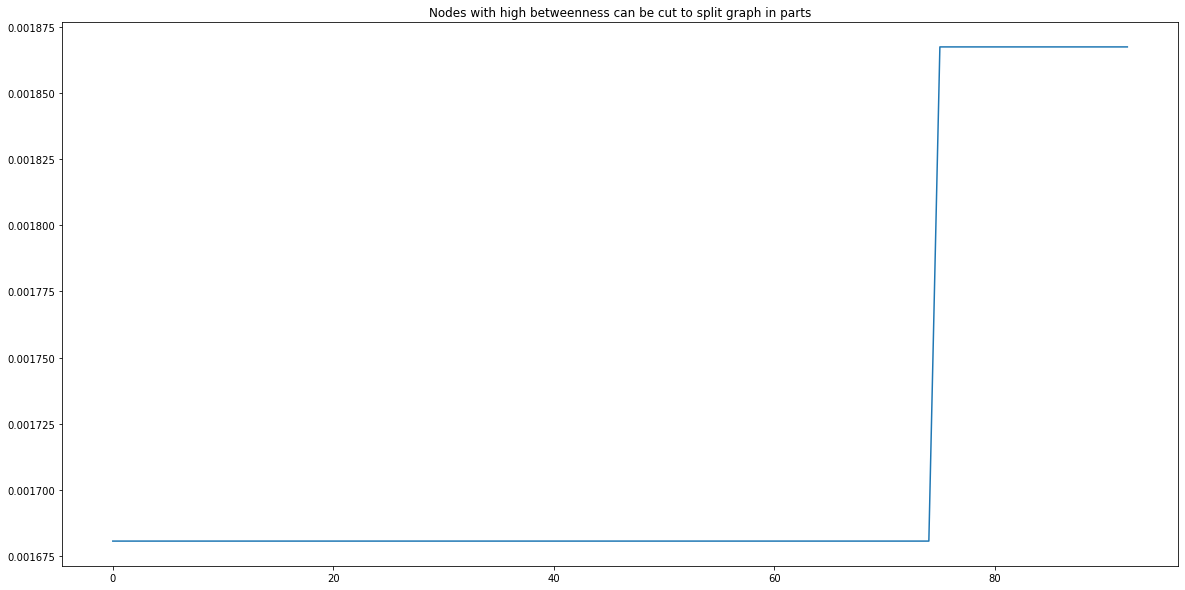

In [38]:
# print betweenness
bt = list(nx.edge_betweenness(G05).values())
plt.plot(range(len(bt)), sorted(bt))
plt.title("Nodes with high betweenness can be cut to split graph in parts")
plt.show()

In [39]:
# remove edges with betweenness larger than threshold
thr = 0.0017
while True:
    bt = nx.edge_betweenness(G05)
    
    i = np.argmax(list(bt.values()))
    if list(bt.values())[i] < thr:
        break
    n1, n2 = list(bt.keys())[i]
    G05.remove_edge(n1, n2)

# clean graph from single-node components for easy printing
for n, d in list(nx.degree(G05)):
    if d == 0:
        G05.remove_node(n)

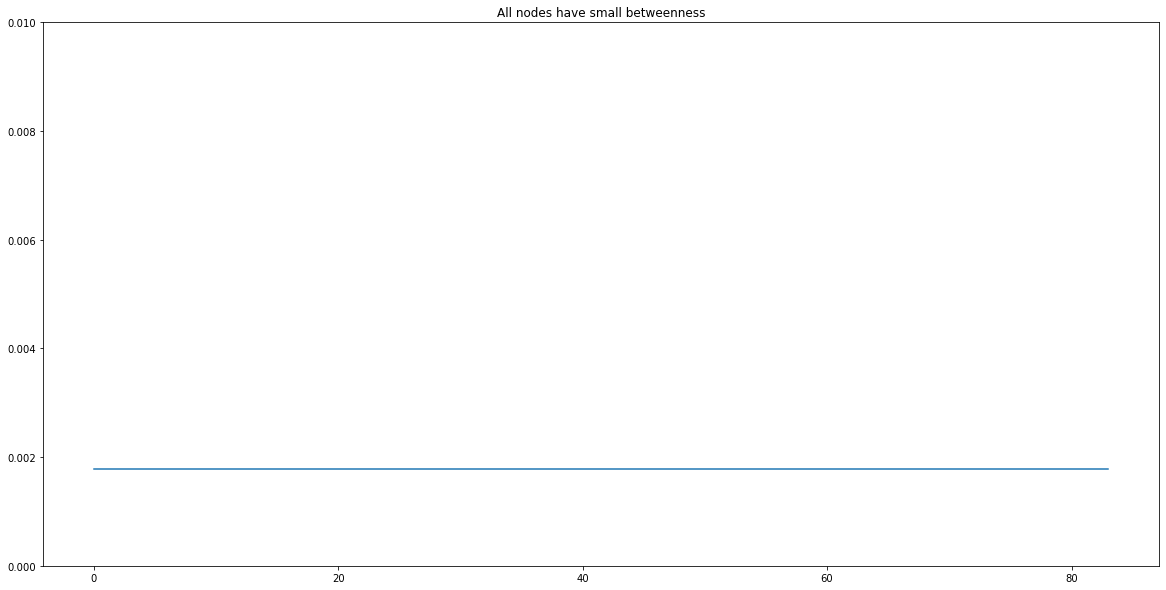

In [40]:
# print new betweenness
bt = nx.edge_betweenness(G05).values()
plt.plot(range(len(bt)), sorted(bt))
plt.title("All nodes have small betweenness")
plt.ylim([0, 0.01])
plt.show()

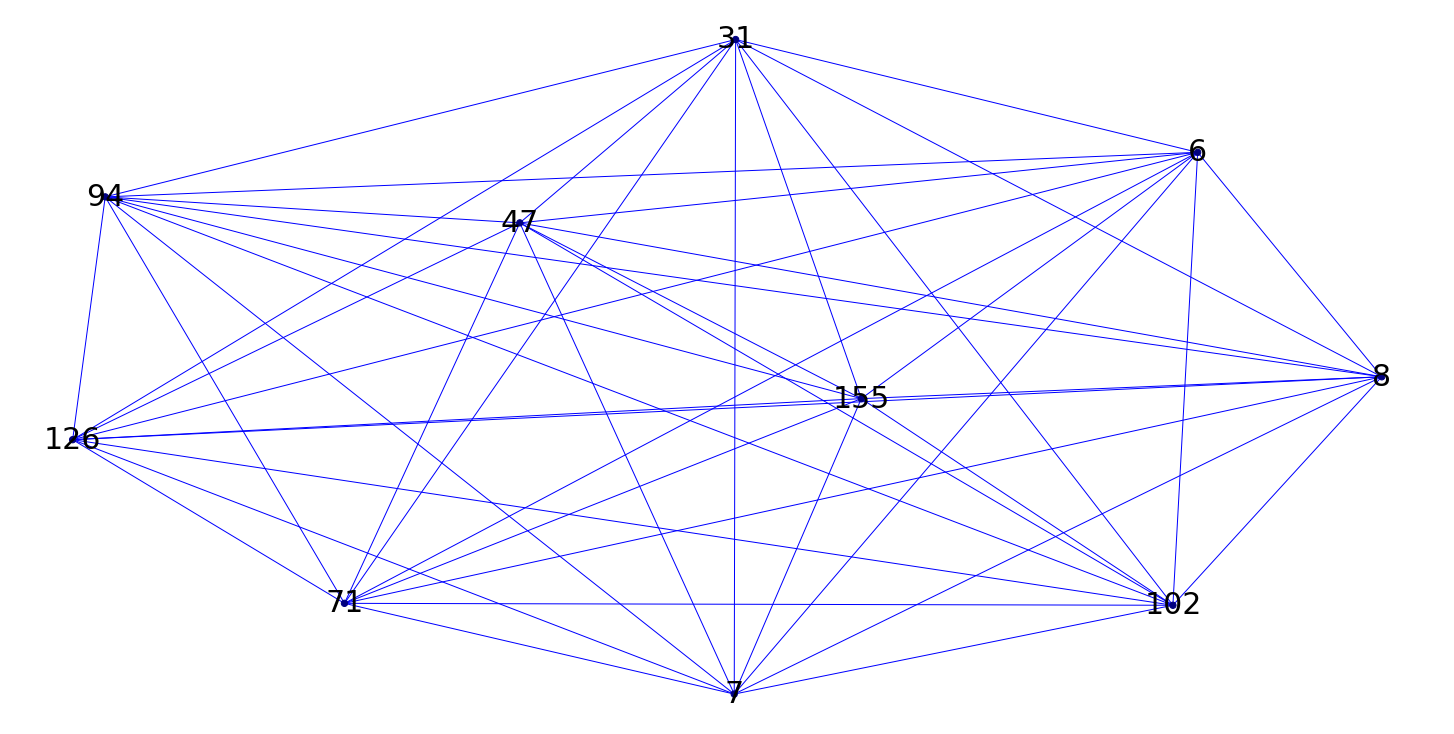

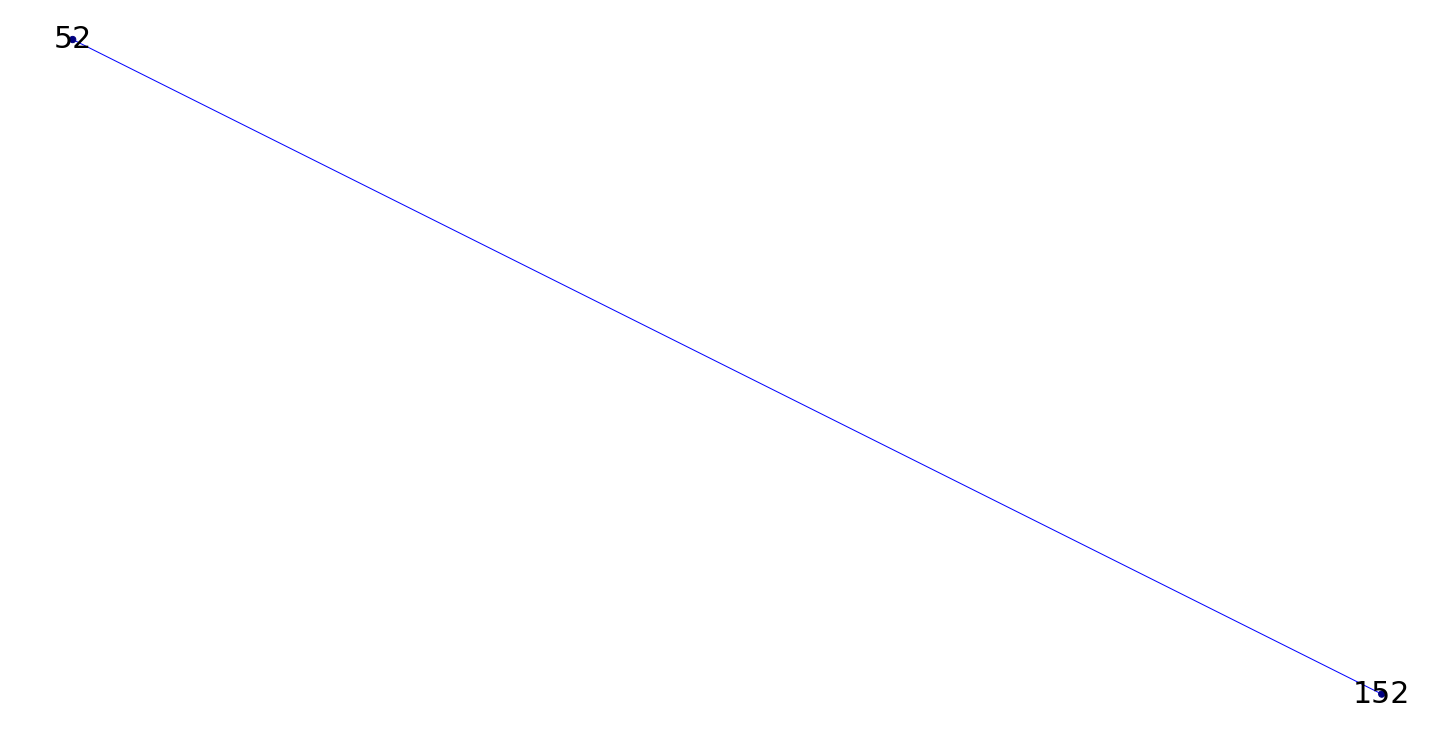

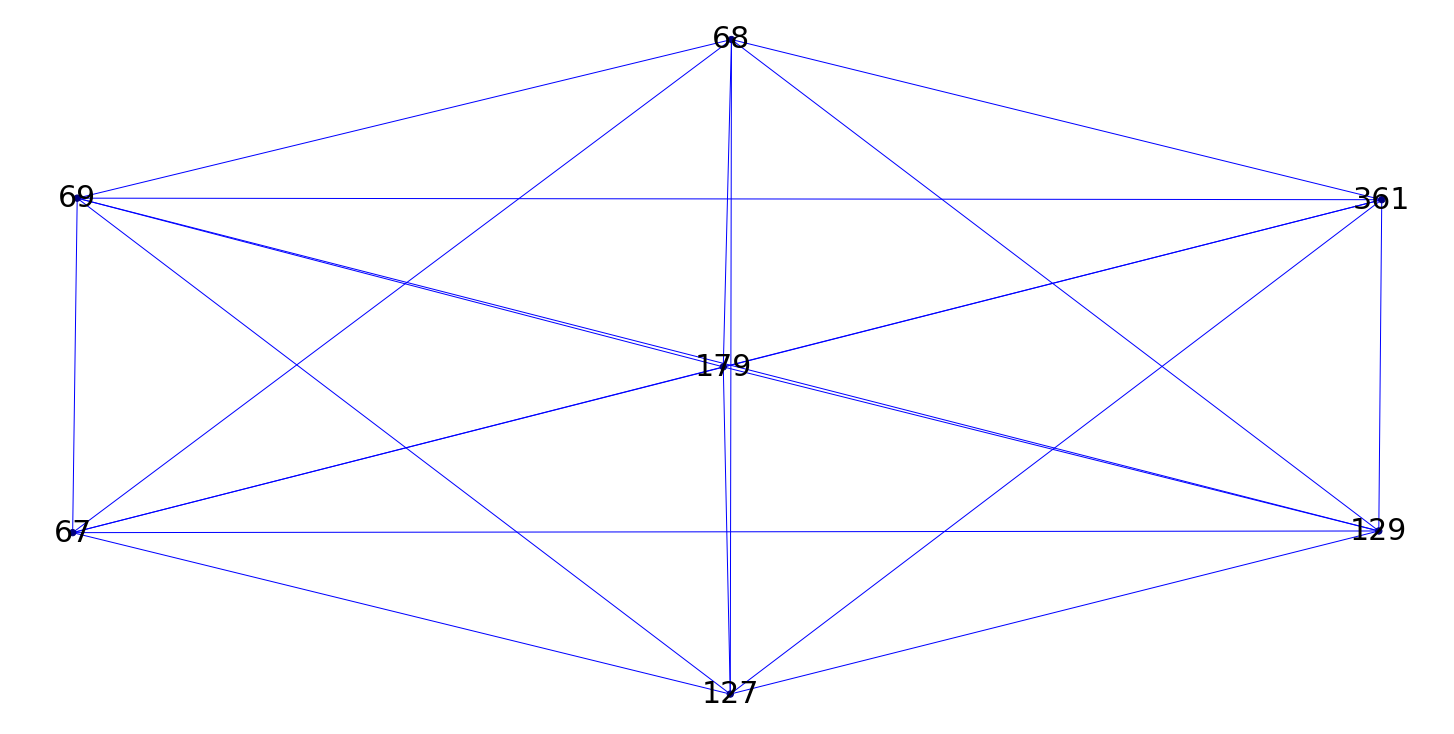

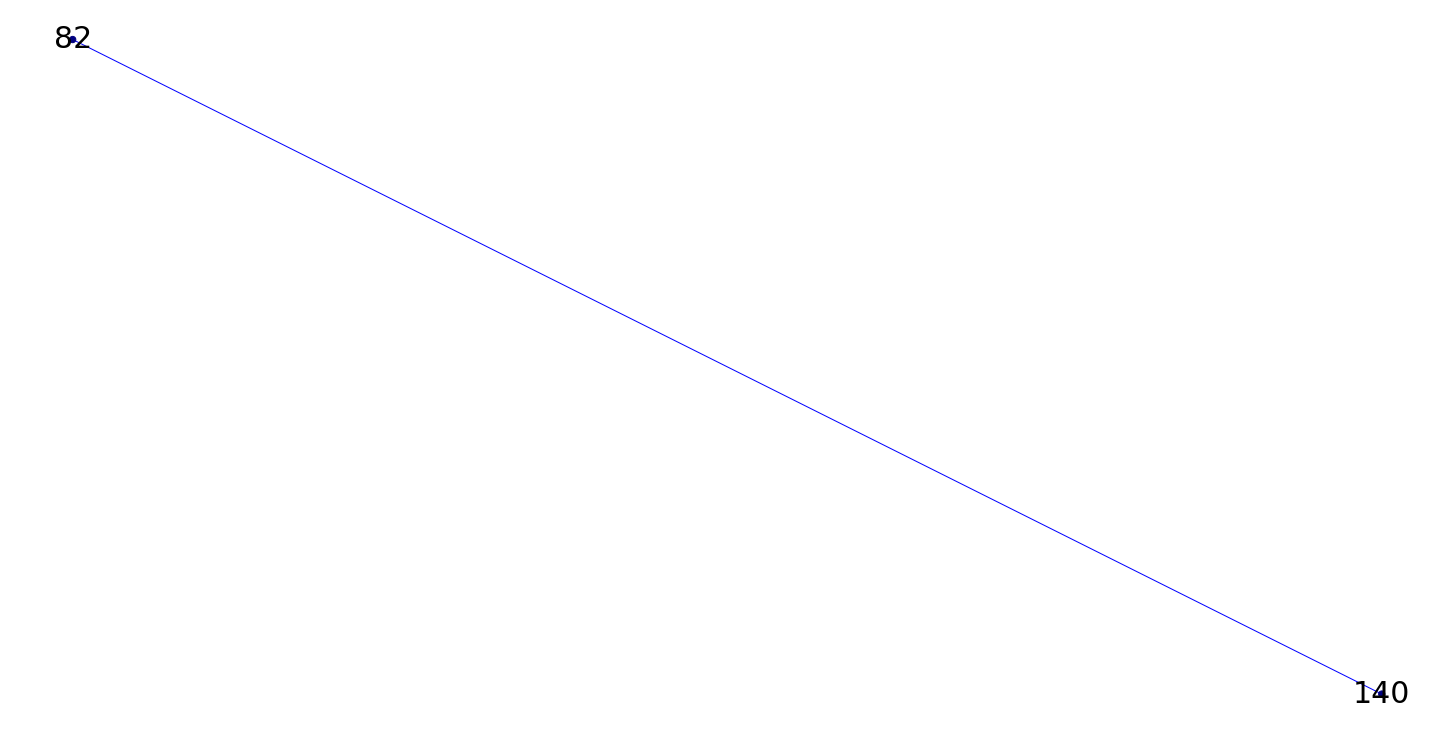

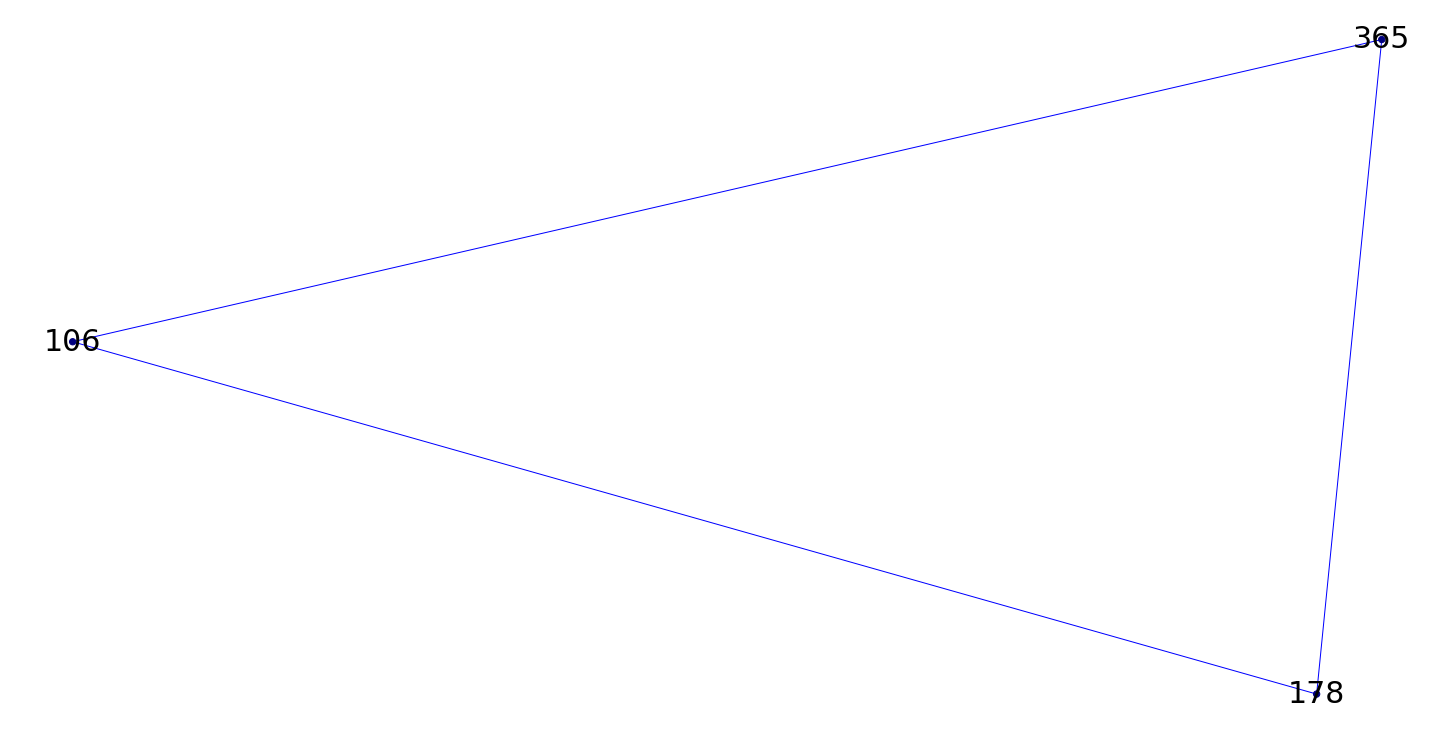

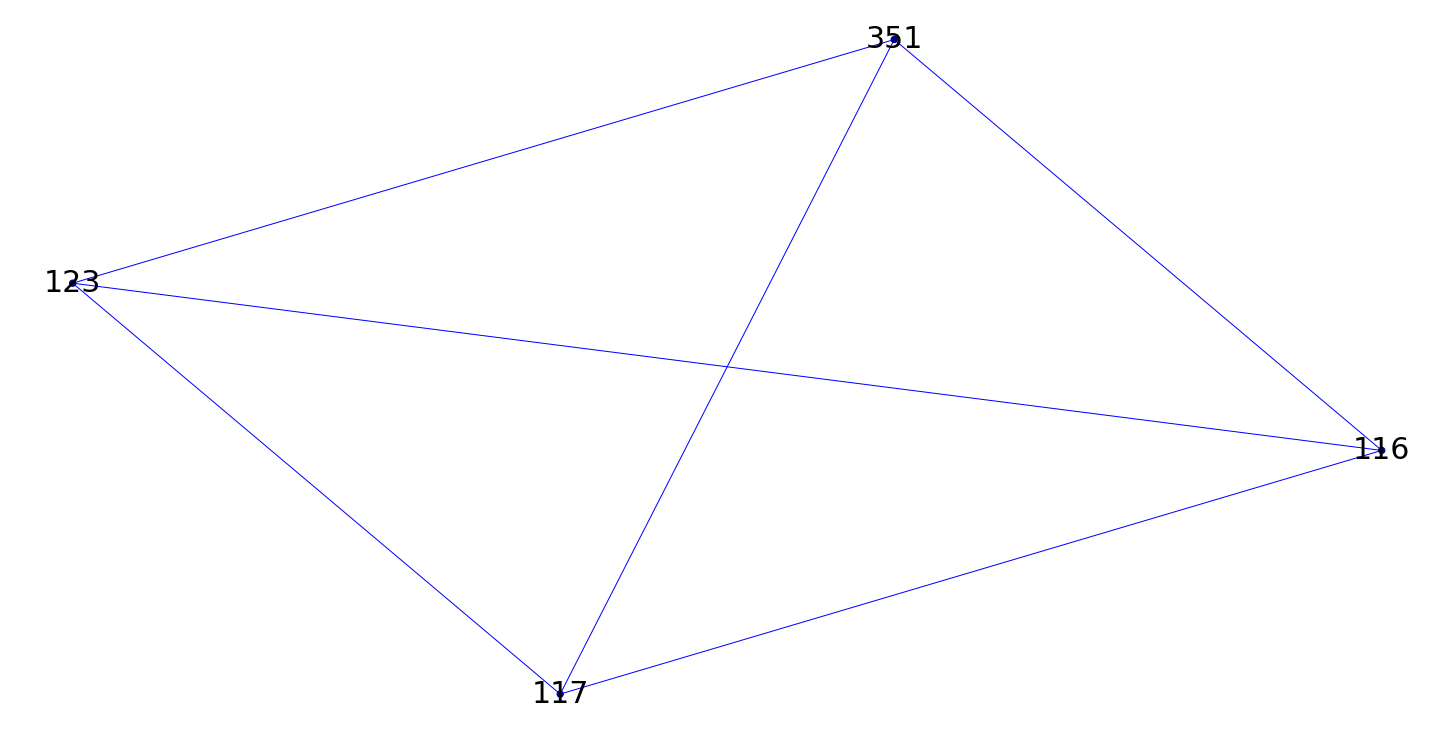

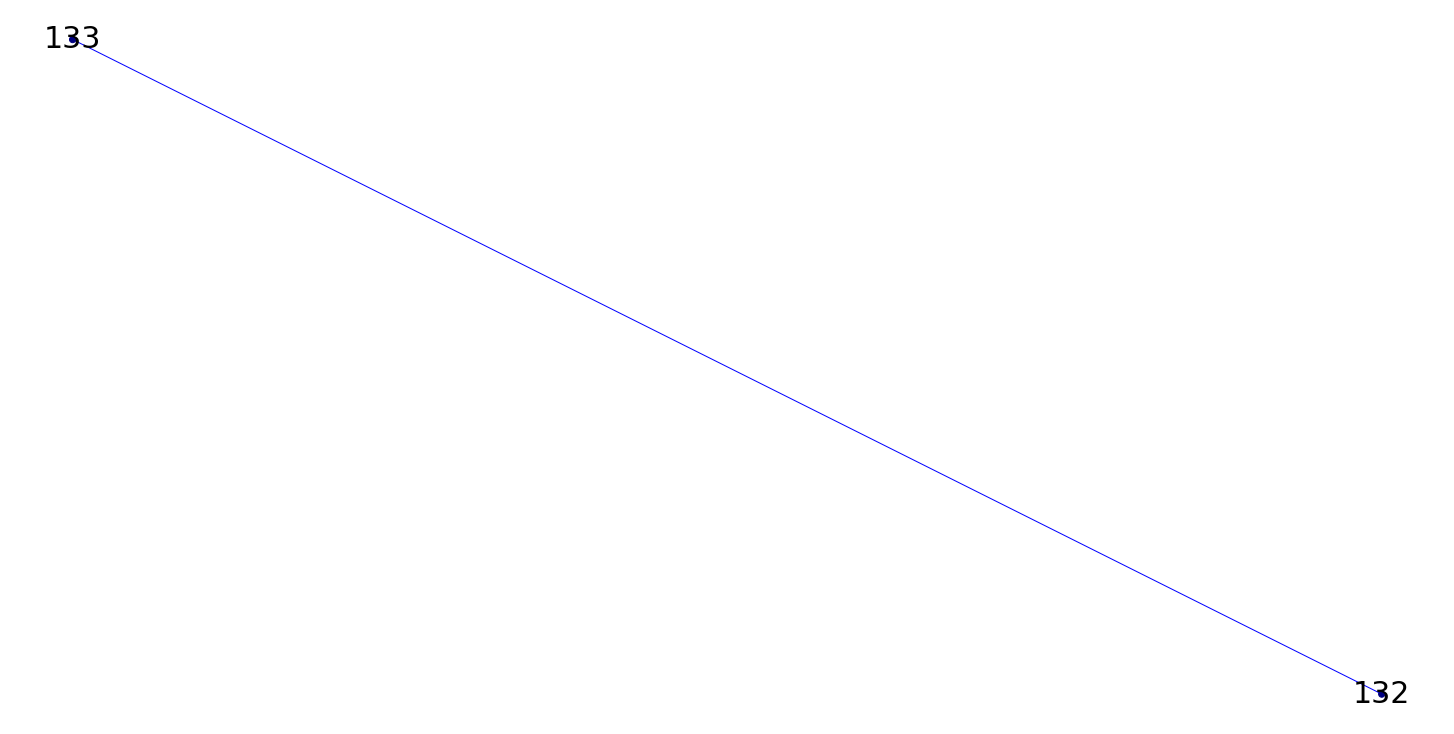

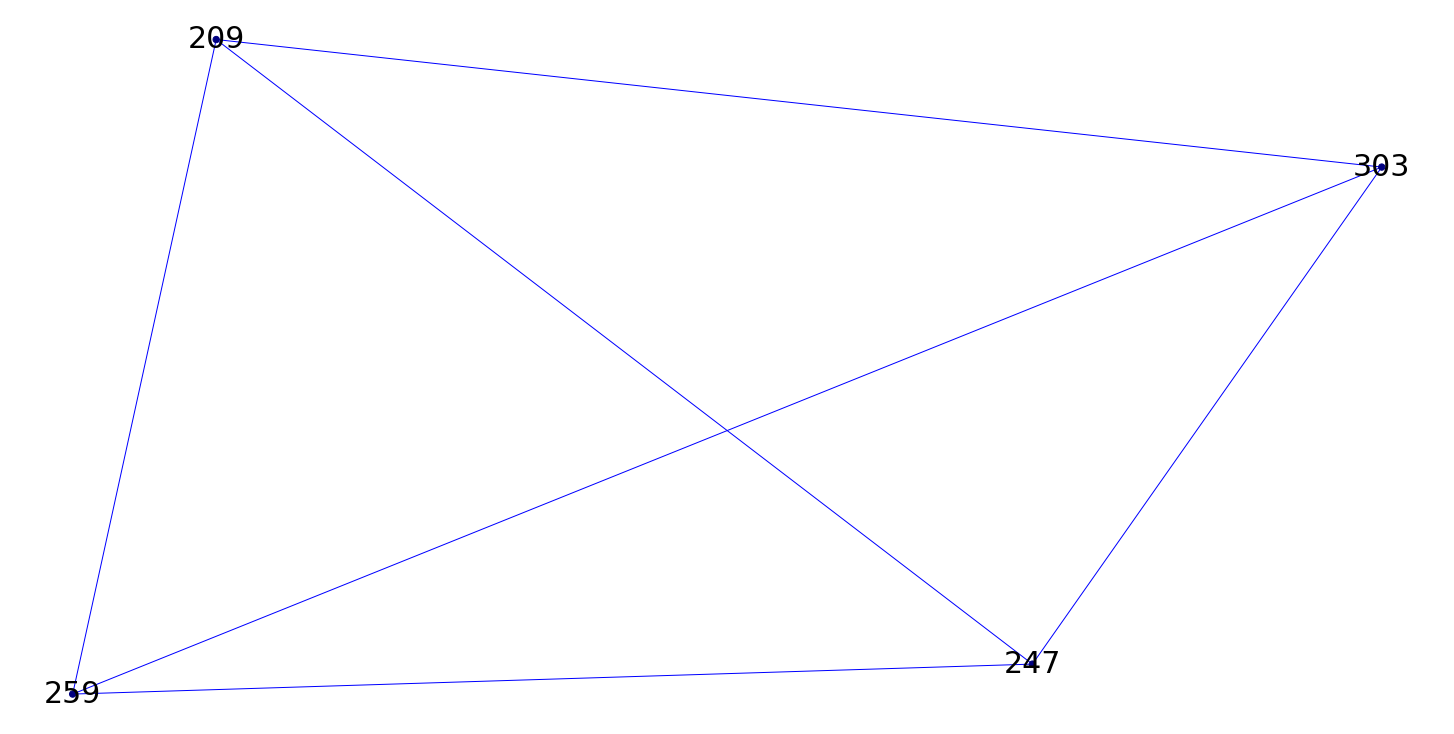

In [41]:
def connected_component_subgraphs(G):
    for c in nx.connected_components(G):
        yield G.subgraph(c)
        
# print found components
#for G1 in nx.connected_component_subgraphs(G):  # for nx < 2.4 version
for G1 in connected_component_subgraphs(G05): # for nx >= 2.4 version
    node_degrees = list(dict(nx.degree(G1)).values())
    nx.draw(G1, with_labels = True, font_size = 30, node_size=40, edge_color="b", cmap=plt.get_cmap('jet'), node_color = node_degrees)
    plt.show()

### Communities with s = 0.8

{(6, 47): 1.0, (6, 71): 1.0, (47, 71): 1.0, (52, 152): 1.0, (67, 68): 1.0, (67, 69): 1.0, (67, 127): 1.0, (67, 129): 1.0, (67, 179): 1.0, (67, 361): 1.0, (68, 69): 1.0, (68, 127): 1.0, (68, 129): 1.0, (68, 179): 1.0, (68, 361): 1.0, (69, 127): 1.0, (69, 129): 1.0, (69, 179): 1.0, (69, 361): 1.0, (127, 129): 1.0, (127, 179): 1.0, (127, 361): 1.0, (129, 179): 1.0, (129, 361): 1.0, (179, 361): 1.0, (106, 178): 1.0, (106, 365): 1.0, (178, 365): 1.0, (116, 117): 1.0, (116, 123): 1.0, (116, 351): 1.0, (117, 123): 1.0, (117, 351): 1.0, (123, 351): 1.0, (132, 133): 1.0, (209, 259): 1.0, (209, 303): 1.0, (259, 303): 1.0}
[6, 47, 71, 52, 152, 67, 68, 69, 127, 129, 179, 361, 106, 178, 365, 116, 117, 123, 351, 132, 133, 209, 259, 303]
Cluster
([6], [47, 71], [52, 152], [67, 68, 69, 127, 129, 179, 361], [106, 178, 365], [116, 117, 123, 351], [132, 133], [209, 259, 303])
([6], [47], [71], [52, 152], [67, 68, 69, 127, 129, 179, 361], [106, 178, 365], [116, 117, 123, 351], [132, 133], [209, 259, 303])

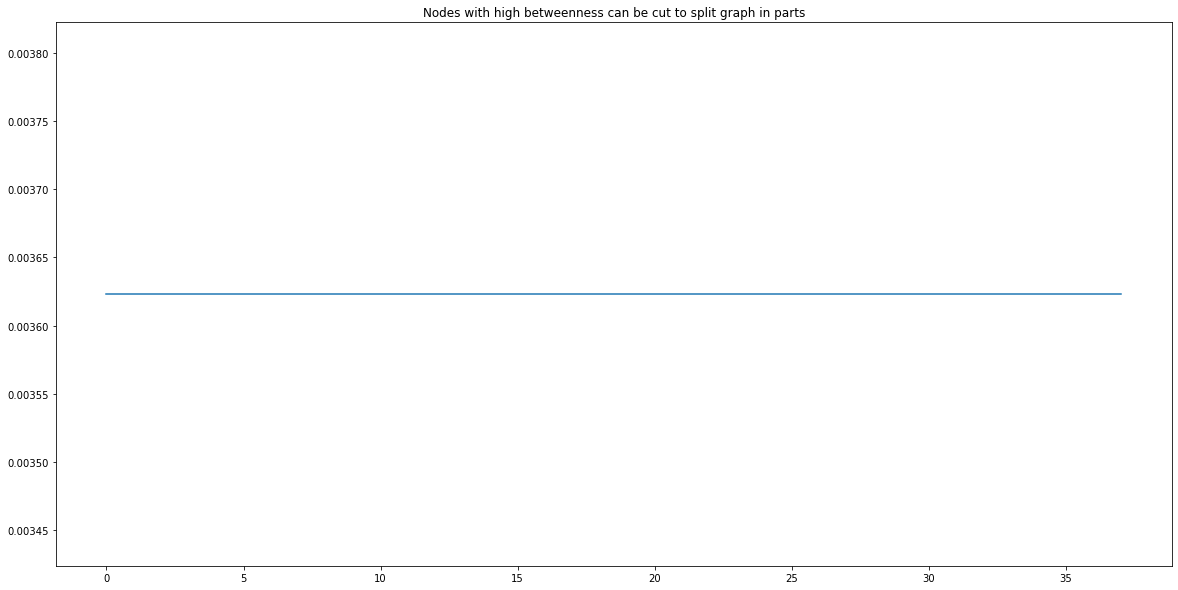

In [42]:
comp_b = betweenness(G08,normalized=False)

print(comp_b)

# New graph
Gw08 = nx.Graph()


for a,b in zip(comp_b.keys(),comp_b.values()):
        Gw08.add_edge(a[0], a[1], weight=b)

k = 5

print(list(Gw08.nodes))
print('Cluster')
comp_gn = girvan_newman(Gw08, most_valuable_edge=heaviest)
for communities in itertools.islice(comp_gn, k):
    sleep(2)
    print(tuple(sorted(c) for c in communities))
    
bt = list(nx.edge_betweenness(G08).values())
plt.plot(range(len(bt)), sorted(bt))
plt.title("Nodes with high betweenness can be cut to split graph in parts")
#plt.ylim([0, 0.02])
plt.show()

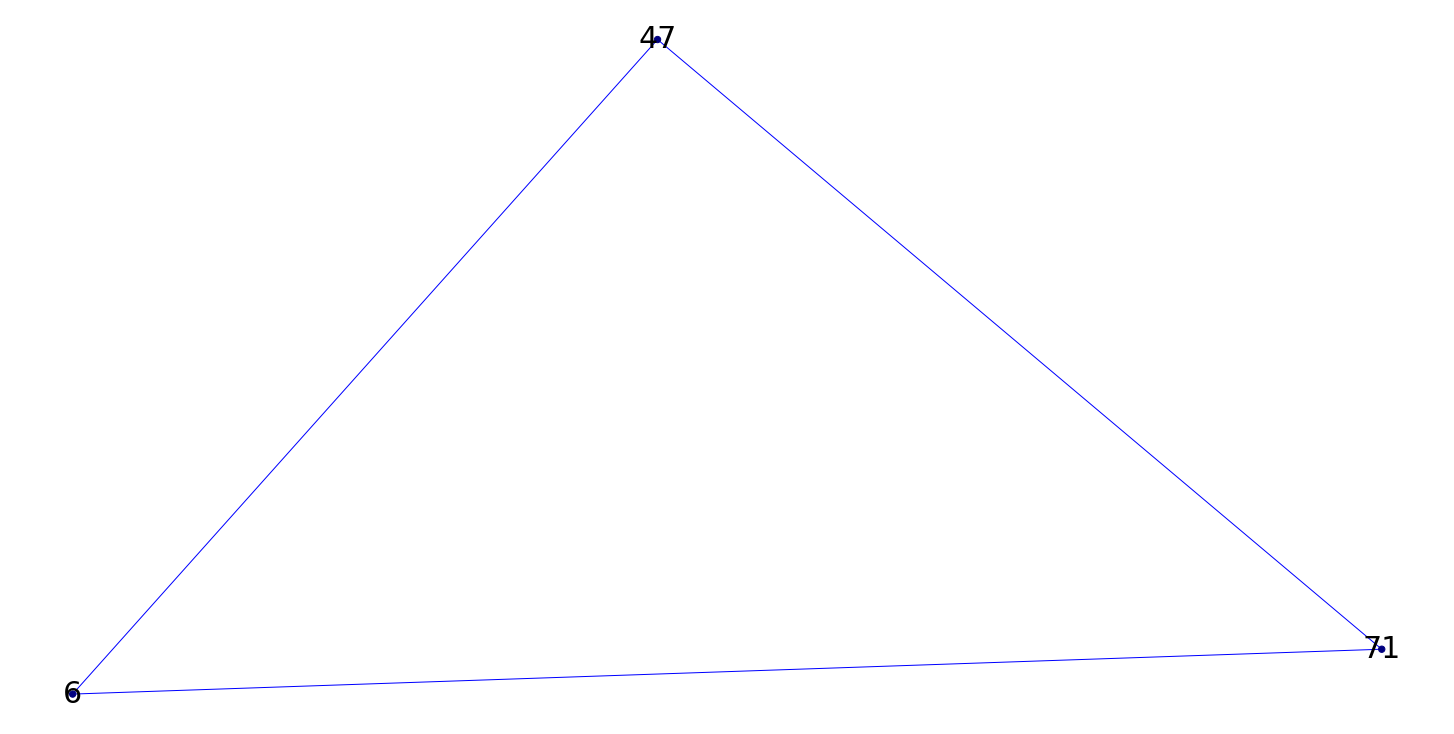

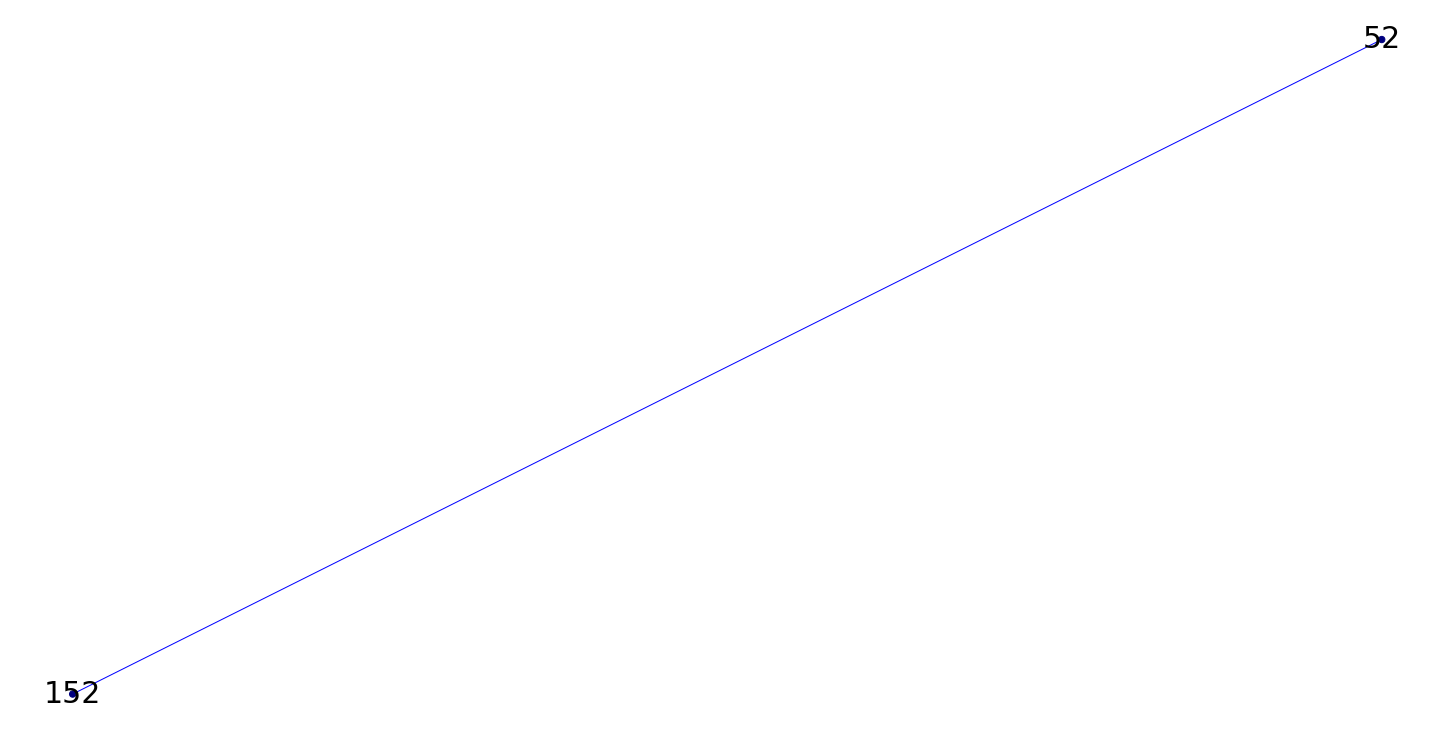

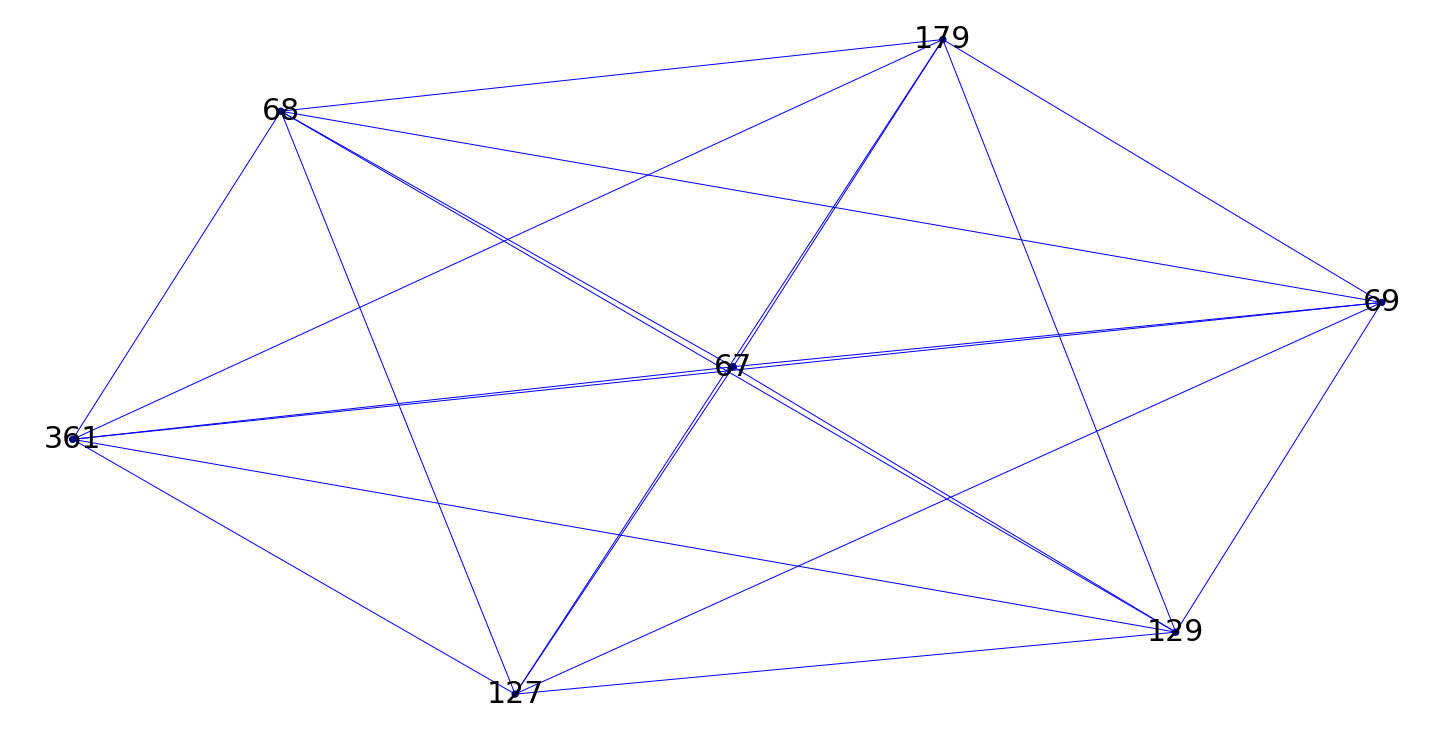

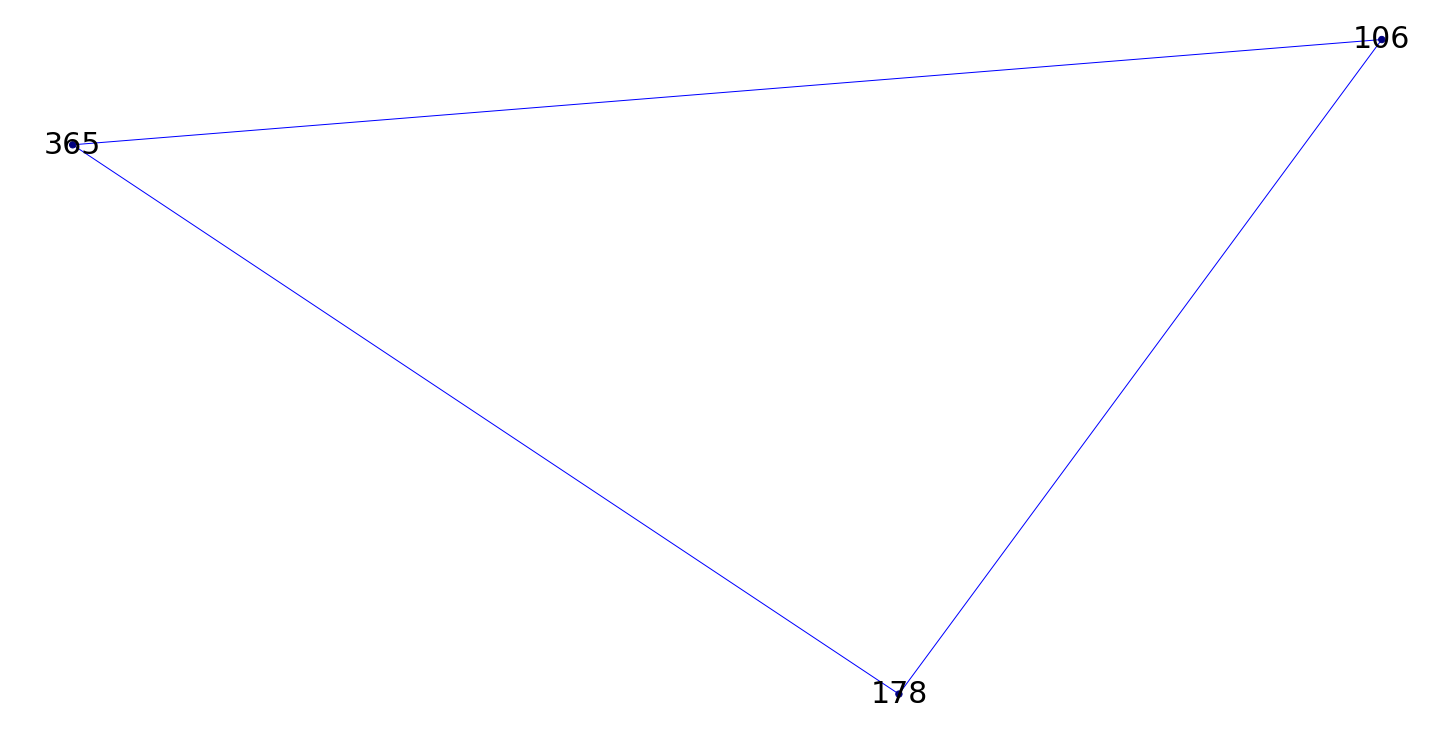

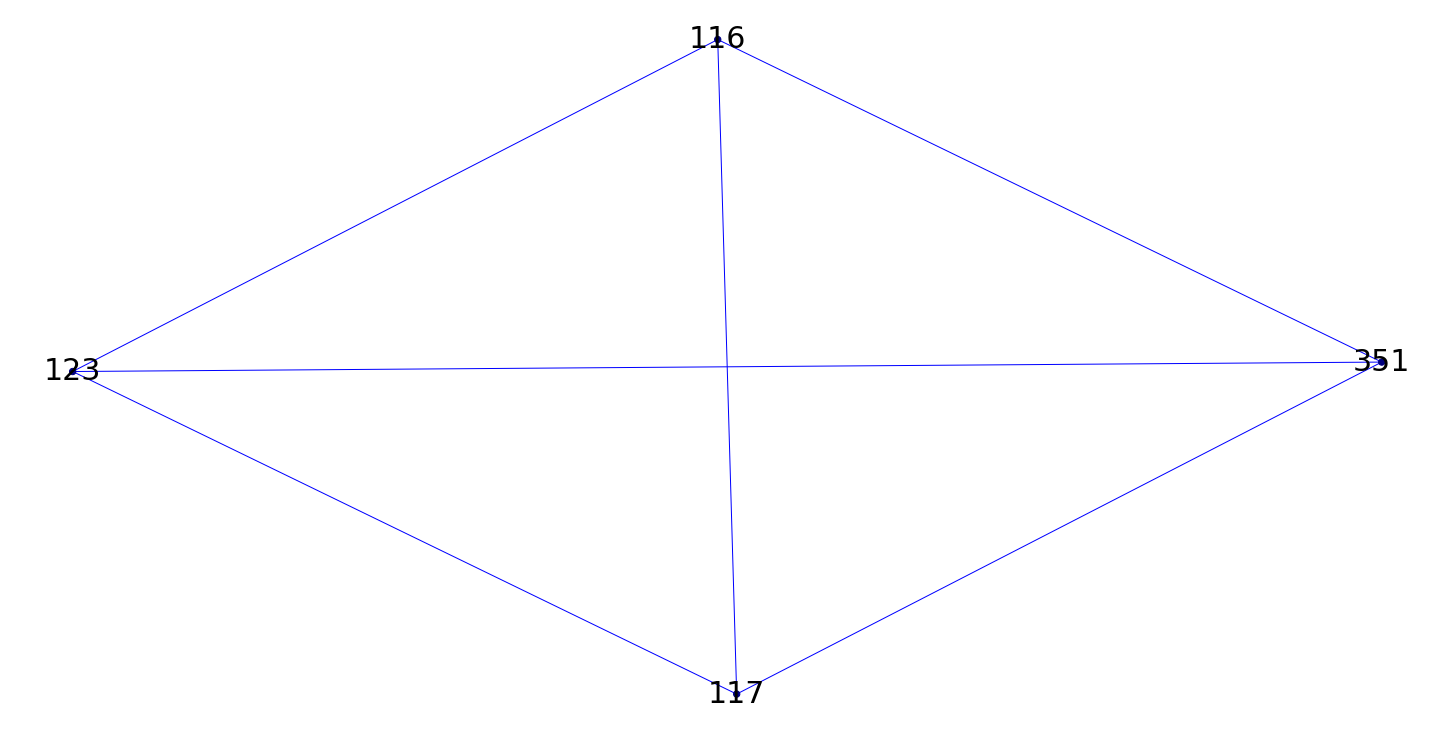

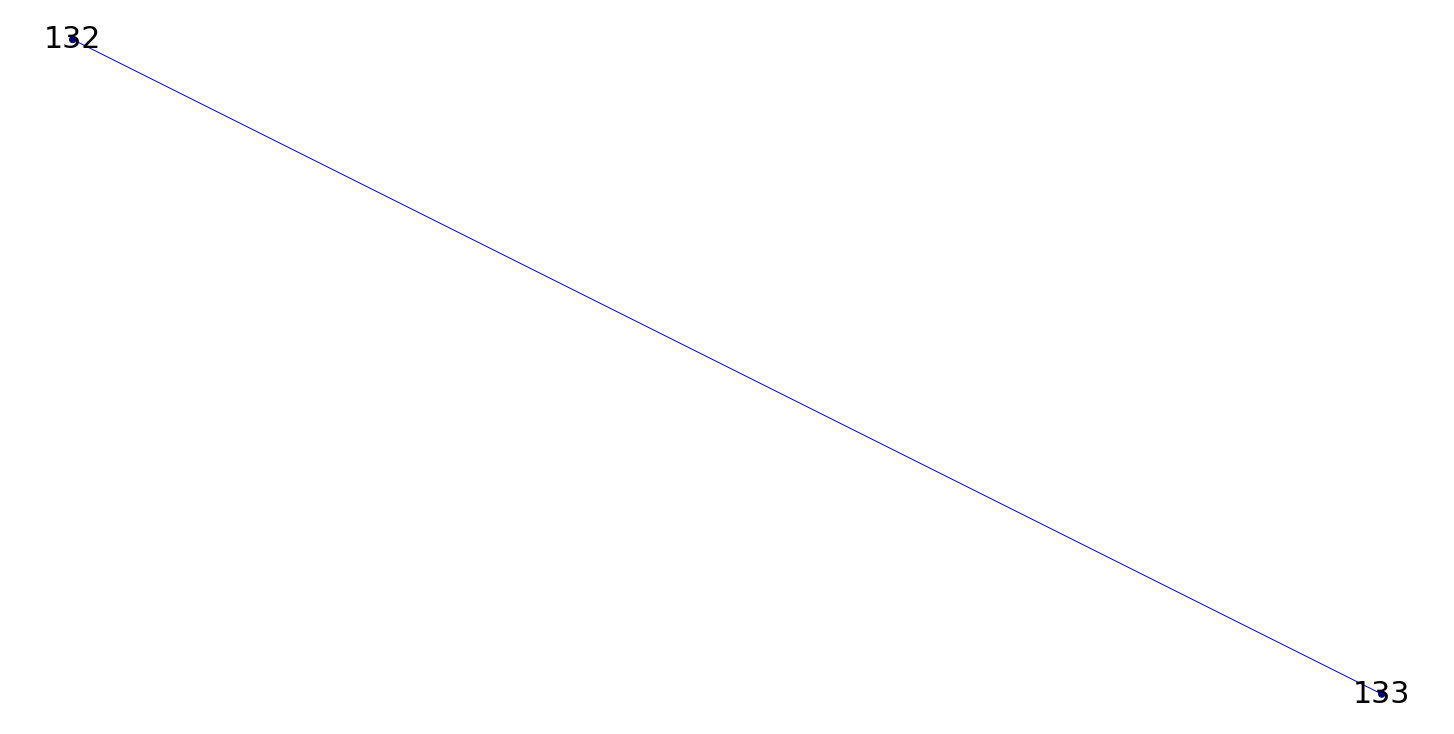

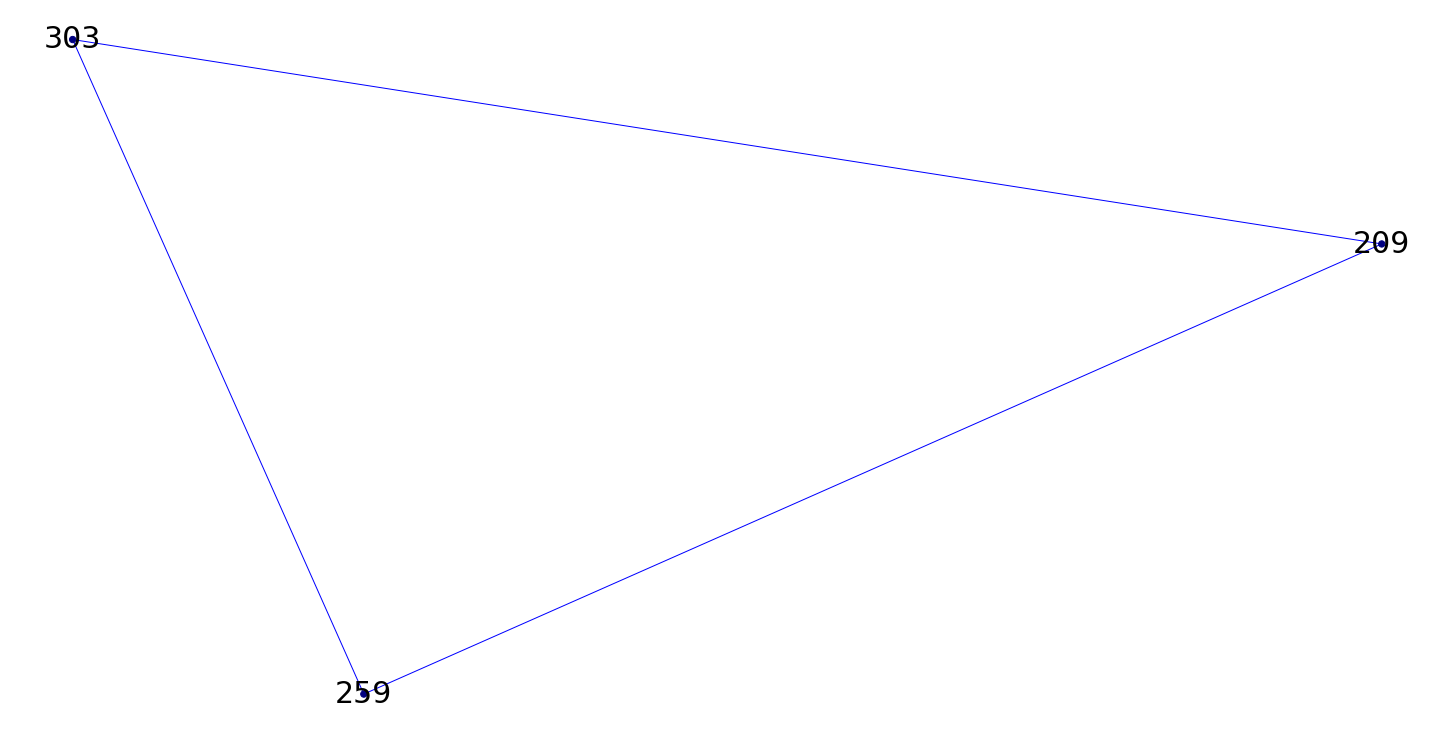

In [43]:
# remove edges with betweenness larger than threshold
thr = 0.004
while True:
    bt = nx.edge_betweenness(G08)
    
    i = np.argmax(list(bt.values()))
    if list(bt.values())[i] < thr:
        break
    n1, n2 = list(bt.keys())[i]
    G08.remove_edge(n1, n2)

# clean graph from single-node components for easy printing
for n, d in list(nx.degree(G08)):
    if d == 0:
        G08.remove_node(n)
        
for G1 in connected_component_subgraphs(G08): # for nx >= 2.4 version
    node_degrees = list(dict(nx.degree(G1)).values())
    nx.draw(G1, with_labels = True, font_size = 30, node_size=40, edge_color="b", cmap=plt.get_cmap('jet'), node_color = node_degrees)
    plt.show()

### Communities with s = 0.95

{(52, 152): 1.0, (67, 68): 1.0, (67, 69): 1.0, (67, 127): 1.0, (67, 129): 1.0, (67, 179): 1.0, (67, 361): 1.0, (68, 69): 1.0, (68, 127): 1.0, (68, 129): 1.0, (68, 179): 1.0, (68, 361): 1.0, (69, 127): 1.0, (69, 129): 1.0, (69, 179): 1.0, (69, 361): 1.0, (127, 129): 1.0, (127, 179): 1.0, (127, 361): 1.0, (129, 179): 1.0, (129, 361): 1.0, (179, 361): 1.0, (106, 178): 1.0, (106, 365): 1.0, (178, 365): 1.0, (116, 117): 1.0, (116, 123): 1.0, (116, 351): 1.0, (117, 123): 1.0, (117, 351): 1.0, (123, 351): 1.0, (132, 133): 1.0}
[52, 152, 67, 68, 69, 127, 129, 179, 361, 106, 178, 365, 116, 117, 123, 351, 132, 133]
Cluster
([52], [152], [67, 68, 69, 127, 129, 179, 361], [106, 178, 365], [116, 117, 123, 351], [132, 133])
([52], [152], [67], [68, 69, 127, 129, 179, 361], [106, 178, 365], [116, 117, 123, 351], [132, 133])
([52], [152], [67], [68], [69, 127, 129, 179, 361], [106, 178, 365], [116, 117, 123, 351], [132, 133])
([52], [152], [67], [68], [69], [127, 129, 179, 361], [106, 178, 365], [116,

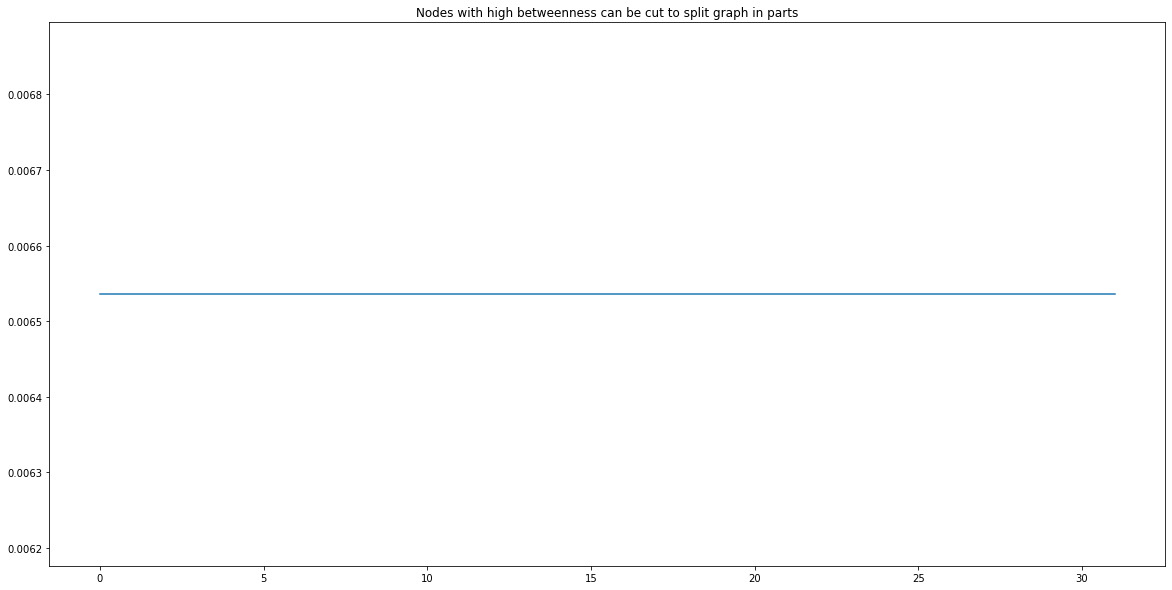

In [44]:
comp_b = betweenness(G095,normalized=False)

print(comp_b)

# New graph
Gw095 = nx.Graph()


for a,b in zip(comp_b.keys(),comp_b.values()):
        Gw095.add_edge(a[0], a[1], weight=b)

k = 5

print(list(Gw095.nodes))
print('Cluster')
comp_gn = girvan_newman(Gw095, most_valuable_edge=heaviest)
for communities in itertools.islice(comp_gn, k):
    sleep(2)
    print(tuple(sorted(c) for c in communities))
    
bt = list(nx.edge_betweenness(G095).values())
plt.plot(range(len(bt)), sorted(bt))
plt.title("Nodes with high betweenness can be cut to split graph in parts")

plt.show()

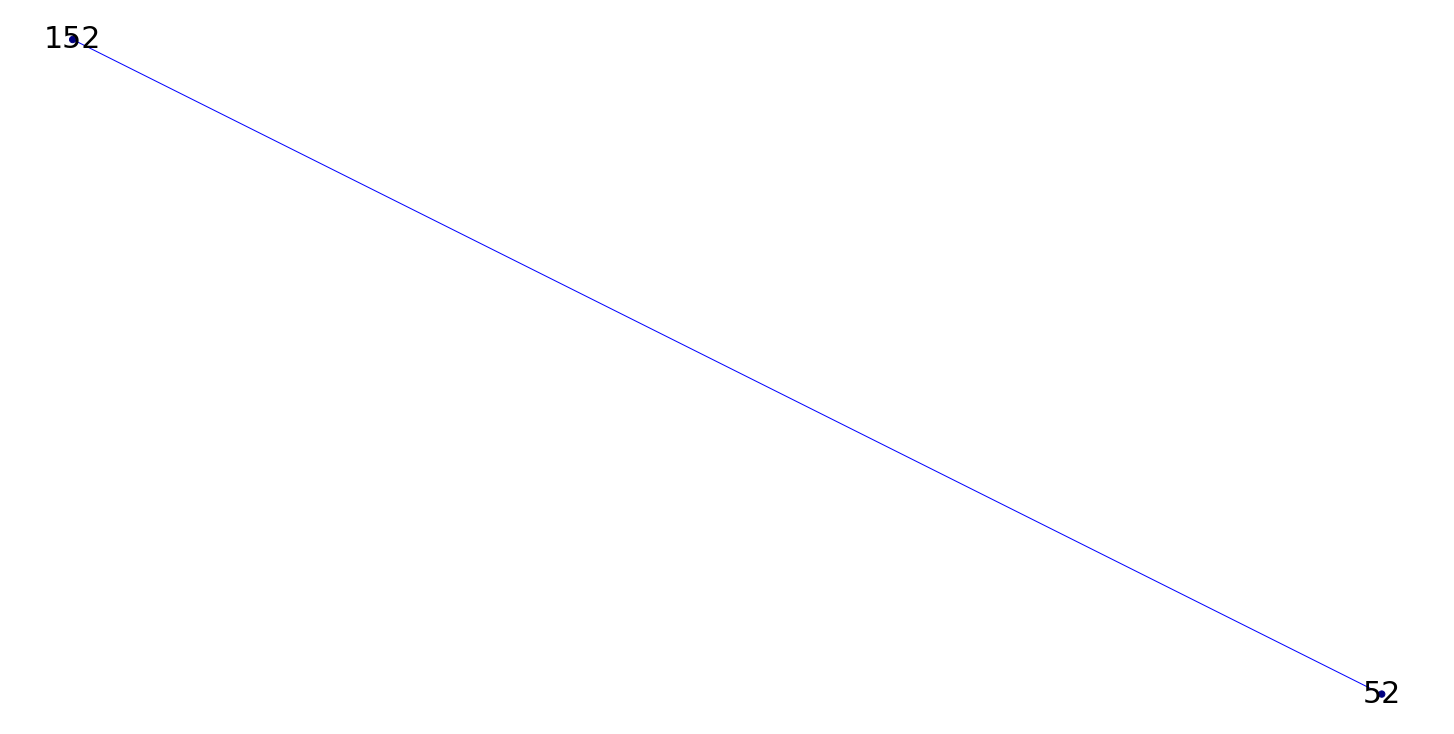

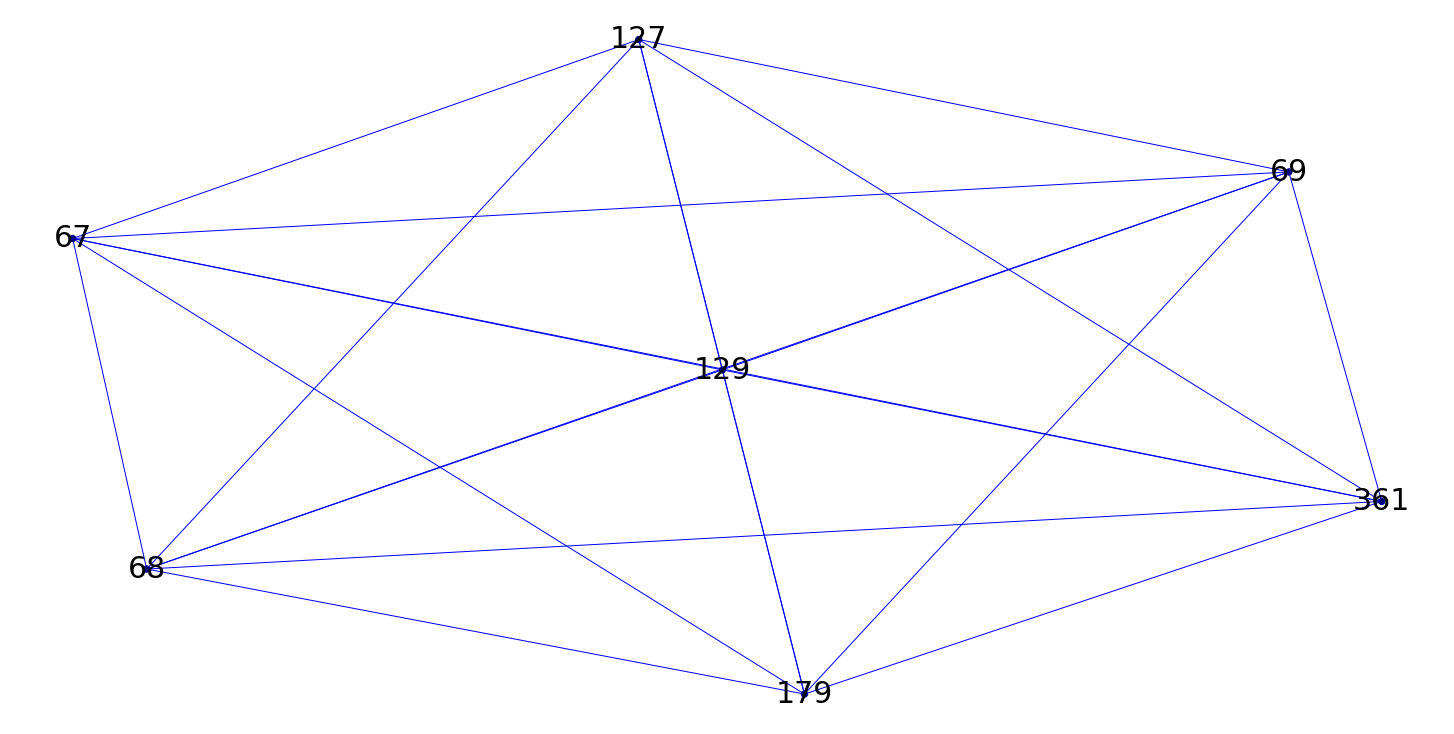

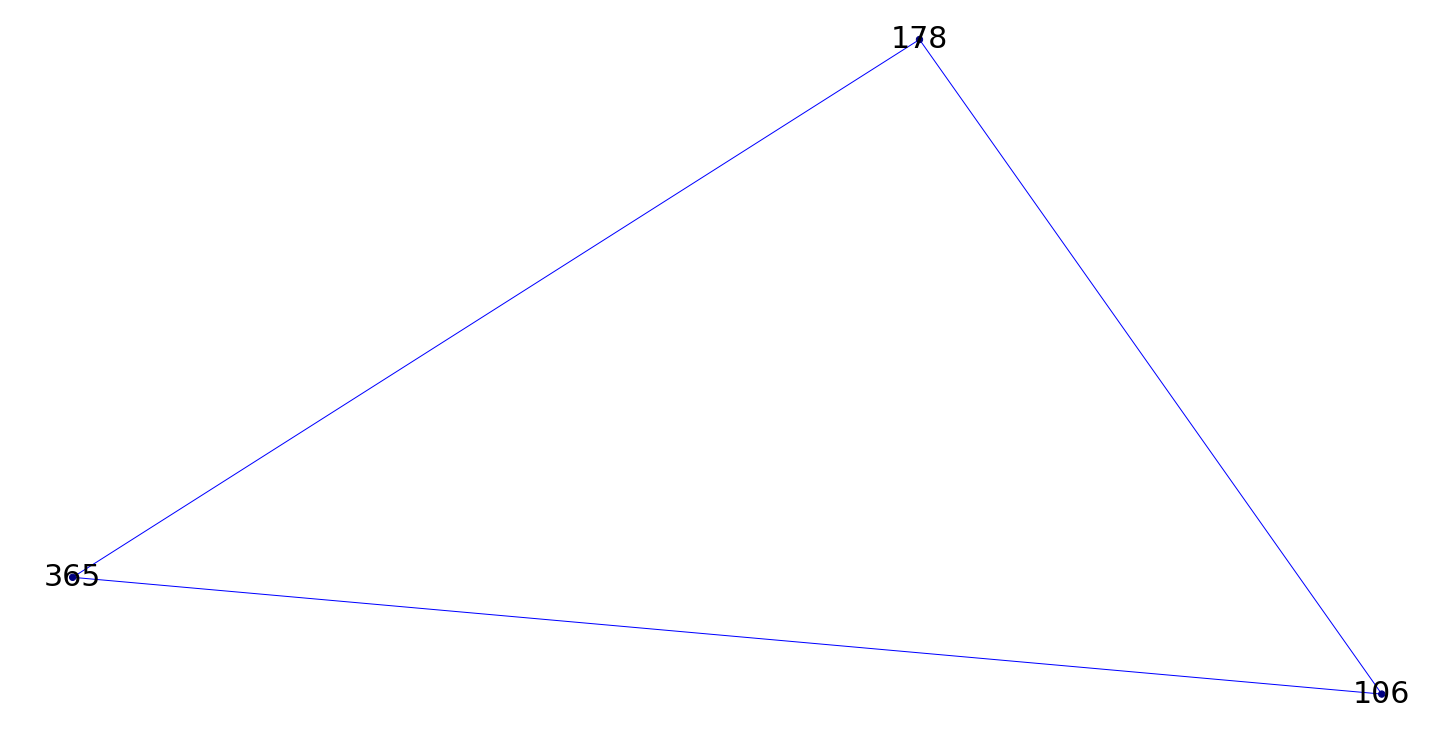

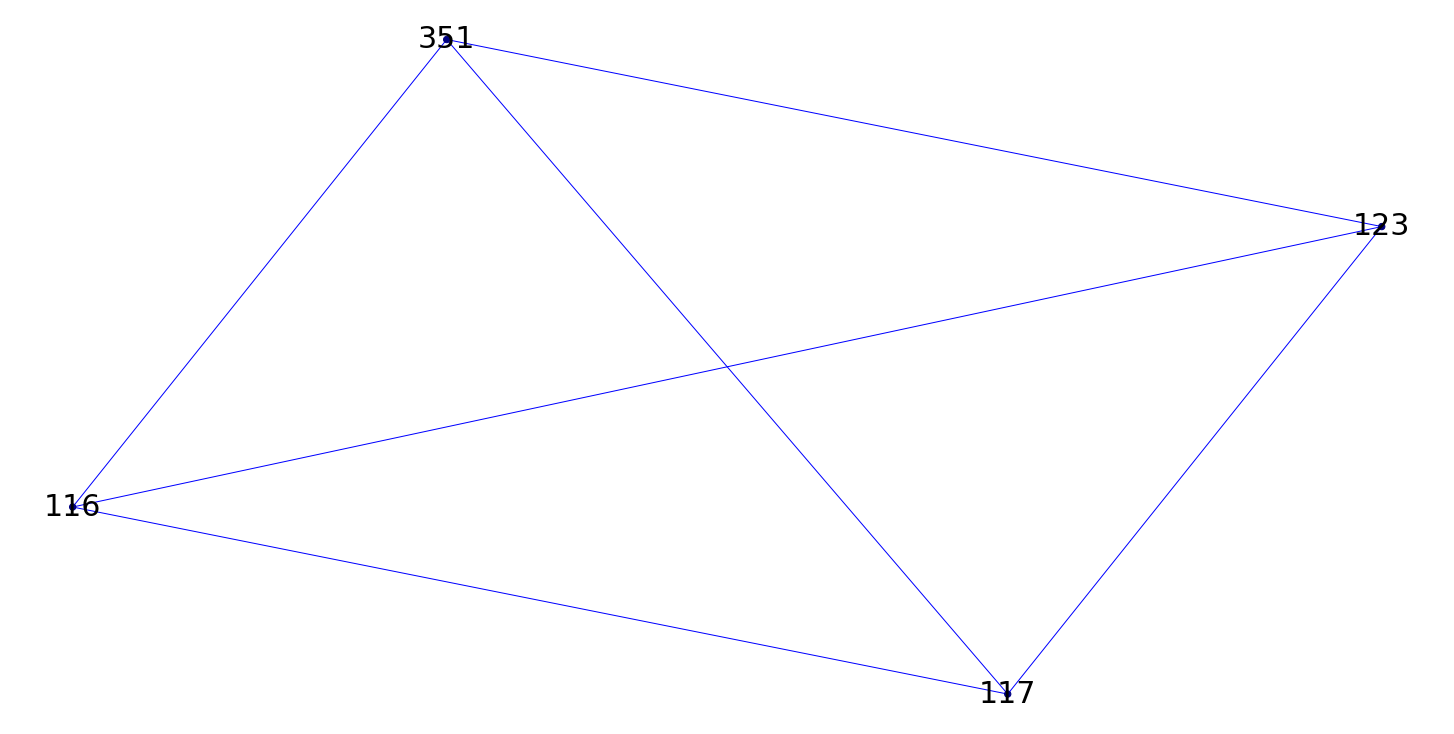

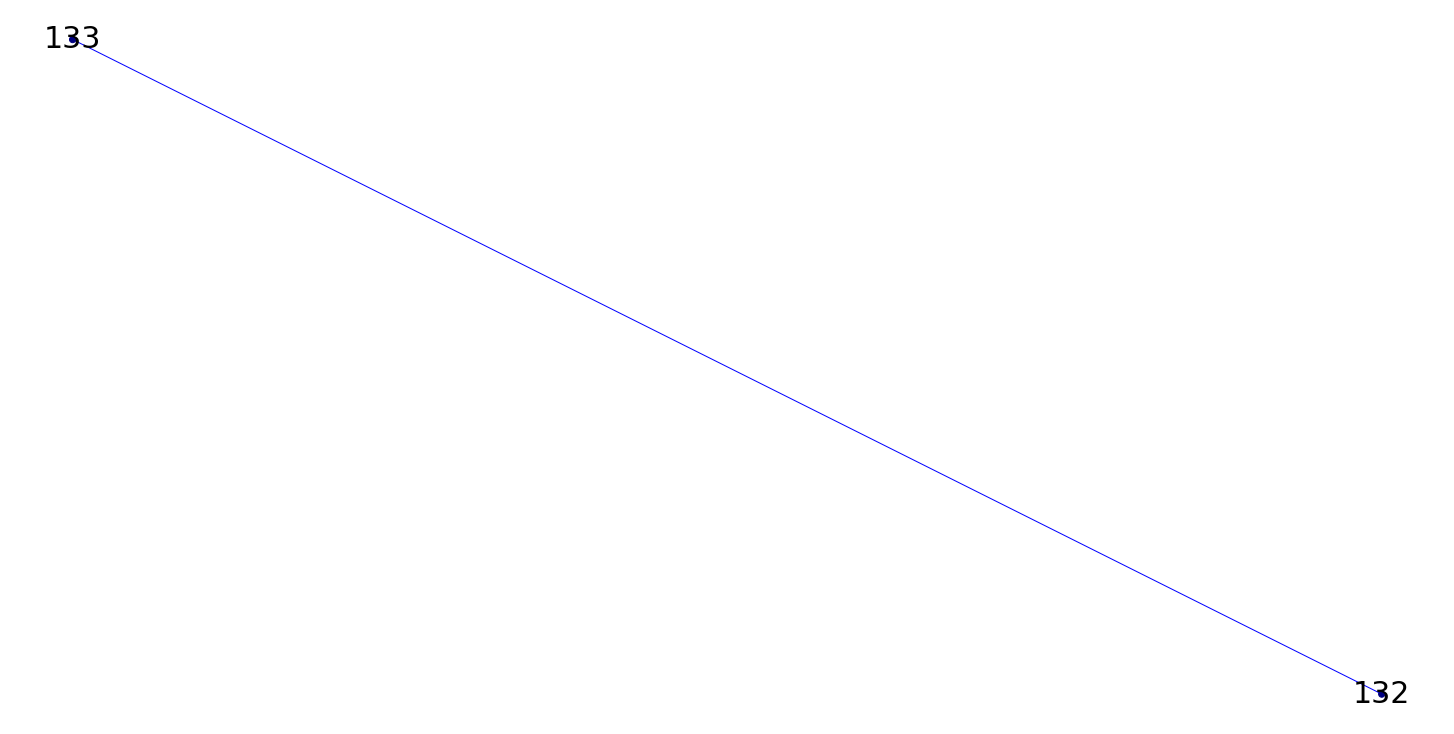

In [45]:
# remove edges with betweenness larger than threshold
thr = 0.007
while True:
    bt = nx.edge_betweenness(G095)
    
    i = np.argmax(list(bt.values()))
    if list(bt.values())[i] < thr:
        break
    n1, n2 = list(bt.keys())[i]
    G095.remove_edge(n1, n2)

# clean graph from single-node components for easy printing
for n, d in list(nx.degree(G095)):
    if d == 0:
        G095.remove_node(n)
        
for G1 in connected_component_subgraphs(G095): # for nx >= 2.4 version
    node_degrees = list(dict(nx.degree(G1)).values())
    nx.draw(G1, with_labels = True, font_size = 30, node_size=40, edge_color="b", cmap=plt.get_cmap('jet'), node_color = node_degrees)
    plt.show()

In [46]:
print(nx.triangles(G095))

{52: 0, 152: 0, 67: 15, 68: 15, 69: 15, 127: 15, 129: 15, 179: 15, 361: 15, 106: 1, 178: 1, 365: 1, 116: 3, 117: 3, 123: 3, 351: 3, 132: 0, 133: 0}


In [47]:
l = list(minhash095)

result = []
if len(l) > 1:
  tmp = [l[0]]
  for i in range(1,len(l)):
    if l[i][0] == l[i-1][1] or l[i][1] == l[i-1][0] or l[i][1] == l[i-1][1] or l[i][0] == l[i-1][0]:
      tmp.append(l[i])
    else:
      result.append(tmp)
      tmp = [l[i]]
  result.append(tmp)
else:
  result = l

for elem in result:
  print(elem)

[(52, 152)]
[(67, 68), (67, 69), (67, 127), (67, 129), (67, 179), (67, 361)]
[(68, 69), (68, 127), (68, 129), (68, 179), (68, 361)]
[(69, 127), (69, 129), (69, 179), (69, 361)]
[(106, 178), (106, 365)]
[(116, 117), (116, 123), (116, 351)]
[(117, 123), (117, 351), (123, 351)]
[(127, 129), (127, 179), (127, 361)]
[(129, 179), (129, 361)]
[(132, 133)]
[(178, 365)]
[(179, 361)]


### Comments: 
1. Finding communities by using Girvan Newman method shows the results with easier visualized views than the cluster results by using 1-nn method. For example: using Minhash_vectorizer with s= 0.95, the communities are found 5, and less than the clusters of 1-nn results


In [48]:
nx.write_gexf(G05, "graph_abstract05.gexf")
mygraph = nx.read_gexf("graph_abstract05.gexf")

In [49]:
nx.write_gexf(G08, "graph_abstract08.gexf")
mygraph = nx.read_gexf("graph_abstract08.gexf")

In [50]:
nx.write_gexf(G095, "graph_abstract095.gexf")
mygraph = nx.read_gexf("graph_abstract095.gexf")

### Visualize with Gephi 

### Newtwork graph for the case of s=0.5 

### Network graph for the case of s=0.8

### Network graph for the case of s =0.95